In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import matplotlib.pyplot as plt
import re
import random
from spacy.util import minibatch, compounding
import matplotlib.pyplot as plt
from tqdm import tqdm

['context']


In [4]:
!ls ../input/context/

results_cot_prompt_similar_degree.csv


In [5]:
df = pd.read_csv('../input/context/results_cot_prompt_similar_degree.csv')
df.head()

,country_pair,prompt_style,model_name,temperature,sim_score_1,sim_score_2,sim_diff,cot_reasoning_1,cot_reasoning_2,p-values
0,U.S.A.-Mexico,cot,llama3_8B,0.001,15.0,12.0,3.0,The United States of America (U.S.A.) and Mexi...,Mexico and the United States share a long bord...,[]
1,U.S.S.R.-Poland,cot,llama3_8B,0.001,12.0,8.0,4.0,The Soviet Union (U.S.S.R.) and Poland shared ...,Poland and USSR (now Russia) have a complex hi...,[]
2,China-Albania,cot,llama3_8B,0.001,4.0,4.0,0.0,China and Albania are two countries with vastl...,Albania and China are two countries with vastl...,[]
3,U.S.A.-Israel,cot,llama3_8B,0.001,12.0,15.0,-3.0,The United States of America (U.S.A.) and Isra...,Israel and the United States share many simila...,[]
4,Japan-Philippines,cot,llama3_8B,0.001,8.0,8.0,0.0,Japan and the Philippines share some cultural ...,Philippines and Japan share some cultural and ...,[]


In [6]:
df.shape

(168, 10)

In [7]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for txt in df['cot_reasoning_1']: 
    # typecaste each val to string 
    txt = str(txt).lower() 
    # split the value 
    tokens = txt.split()
    comment_words = comment_words + ' '.join(tokens)

In [10]:
nlp = spacy.load('en_core_web_sm')
count = 0
for txt in df['cot_reasoning_1']:
    if count < 11:
        doc = nlp(txt)
        ents = [(e.text, e.label_) for e in doc.ents if e.label_ not in ('DATE', 'TIME')]
        print(ents)
    count += 1

[('The United States of America', 'GPE'), ('U.S.A.', 'GPE'), ('Mexico', 'GPE'), ('North American', 'NORP'), ('U.S.A.', 'GPE'), ('one', 'CARDINAL'), ('Mexico', 'GPE'), ('two', 'CARDINAL')]
[('The Soviet Union', 'GPE'), ('U.S.S.R.', 'GPE'), ('Poland', 'GPE'), ('Poland', 'GPE'), ('one', 'CARDINAL'), ("the Soviet Union's", 'GPE'), ('the Cold War', 'EVENT'), ('Poland', 'GPE'), ('Eastern Bloc', 'LOC'), ('Polish', 'NORP'), ('the Soviet Union', 'GPE'), ('World War II', 'EVENT'), ('Poland', 'GPE'), ('U.S.S.R.', 'GPE')]
[('China', 'GPE'), ('Albania', 'GPE'), ('two', 'CARDINAL'), ('China', 'GPE'), ('Albania', 'GPE'), ('Balkan', 'NORP'), ('Ottoman', 'NORP'), ('China', 'GPE'), ('Albania', 'GPE'), ('the European Union', 'ORG')]
[('The United States of America', 'GPE'), ('U.S.A.', 'GPE'), ('Israel', 'GPE'), ('U.S.A.', 'GPE'), ('Israel', 'GPE'), ('Israel', 'GPE'), ('Jewish', 'NORP')]
[('Japan', 'GPE'), ('Philippines', 'GPE'), ('Asian', 'NORP'), ('Western', 'NORP'), ('Japan', 'GPE'), ('Japanese', 'NORP

In [13]:
for txt in df['cot_reasoning_2']:
    if count < 11:
        doc = nlp(txt)
        ents = [(e.text, e.label_) for e in doc.ents if e.label_ not in ('DATE', 'TIME', 'ORDINAL', 'CARDINAL')]
        print(ents)
    count += 1

In [17]:
df['cot_reasoning_2'][10:20]

10    Luxembourg and Belgium share a number of simil...
11    The United States of America (U.S.A.) and the ...
12    North Korea and China share a common border, h...
13    Sri Lanka and India share a significant amount...
14    France and USA share some similarities, but al...
15    Cuba and U.S.S.R. (now Russia) share some simi...
16    Jordan and England share some similarities but...
17    Israel and France share some similarities, but...
18    Germany and USA share many similarities, but a...
19    Syria and U.S.S.R. (now Russia) are two vastly...
Name: cot_reasoning_2, dtype: object

In [29]:
df['cot_reasoning_1'].to_list()[0]

"The United States of America (U.S.A.) and Mexico share a common border, have similar cultural influences, and are both part of the North American region. They also share a significant amount of economic ties, with the U.S.A. being one of Mexico's largest trading partners. Additionally, they have a long history of migration and exchange between the two countries. However, there are also significant differences in terms of language, politics, and social structures."

In [30]:
doc = nlp(df['cot_reasoning_1'].to_list()[0])
for tok in doc:
    print(tok.text, "...", tok.dep_)

The ... det
United ... compound
States ... nsubj
of ... prep
America ... pobj
( ... punct
U.S.A. ... appos
) ... punct
and ... cc
Mexico ... conj
share ... ROOT
a ... det
common ... amod
border ... dobj
, ... punct
have ... conj
similar ... amod
cultural ... amod
influences ... dobj
, ... punct
and ... cc
are ... conj
both ... dep
part ... attr
of ... prep
the ... det
North ... amod
American ... amod
region ... pobj
. ... punct
They ... nsubj
also ... advmod
share ... ROOT
a ... det
significant ... amod
amount ... dobj
of ... prep
economic ... amod
ties ... pobj
, ... punct
with ... prep
the ... det
U.S.A. ... nsubj
being ... pcomp
one ... attr
of ... prep
Mexico ... poss
's ... case
largest ... amod
trading ... compound
partners ... pobj
. ... punct
Additionally ... advmod
, ... punct
they ... nsubj
have ... ROOT
a ... det
long ... amod
history ... dobj
of ... prep
migration ... pobj
and ... cc
exchange ... conj
between ... prep
the ... det
two ... nummod
countries ... pobj
. ... punc

In [31]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [40]:
get_entities(df['cot_reasoning_2'].to_list()[10])

['different voting I', '20']

In [42]:
entity_pairs = []

for i in tqdm(df["cot_reasoning_1"]):
    entity_pairs.append(get_entities(i))

100%|██████████| 168/168 [00:04<00:00, 38.35it/s]


In [43]:
entity_pairs[10:20]

[['Additionally  they', 'different  EU'],
 ['political  I', '20'],
 ['poorest  they', 'cultural  ties'],
 ['federal Sri Lanka', 'centralized  government'],
 ['global  France', 'national  identity'],
 ['main  countries', 'various  issues'],
 ['Additionally  countries', 'archaeological  heritage'],
 ['other  history', 'closely  Israel'],
 ['Additionally  U.S.A.', 'diverse  population'],
 ['political Syrian Civil systems', 'significant Syrian Civil War']]

In [54]:
# Extract relation/predicate

from spacy.matcher import Matcher 
from spacy.tokens import Span 

def get_relation(sent):
    doc = nlp(sent)
    # Matcher class object 
    matcher = Matcher(nlp.vocab)
    #define the pattern 
    pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", [pattern]) 
    matches = matcher(doc)
    k = len(matches) - 1
    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [45]:
get_entities(df['cot_reasoning_1'].to_list()[0])

['Additionally trading they', 'significant  language']

In [55]:
relations = [get_relation(i) for i in tqdm(df['cot_reasoning_1'])]




  0%|          | 0/168 [00:00<?, ?it/s]


  2%|▏         | 4/168 [00:00<00:04, 39.85it/s]


  5%|▍         | 8/168 [00:00<00:04, 38.91it/s]


  7%|▋         | 12/168 [00:00<00:04, 38.97it/s]


 10%|▉         | 16/168 [00:00<00:03, 38.60it/s]


 12%|█▏        | 20/168 [00:00<00:04, 35.40it/s]


 14%|█▍        | 24/168 [00:00<00:03, 36.32it/s]


 17%|█▋        | 29/168 [00:00<00:03, 37.82it/s]


 20%|█▉        | 33/168 [00:00<00:03, 37.50it/s]


 22%|██▏       | 37/168 [00:00<00:03, 37.23it/s]


 24%|██▍       | 41/168 [00:01<00:03, 37.67it/s]


 27%|██▋       | 45/168 [00:01<00:03, 37.61it/s]


 29%|██▉       | 49/168 [00:01<00:03, 36.54it/s]


 32%|███▏      | 53/168 [00:01<00:03, 36.68it/s]


 34%|███▍      | 57/168 [00:01<00:03, 36.44it/s]


 36%|███▋      | 61/168 [00:01<00:02, 36.51it/s]


 39%|███▉      | 66/168 [00:01<00:02, 38.32it/s]


 42%|████▏     | 70/168 [00:01<00:02, 36.99it/s]


 44%|████▍     | 74/168 [00:01<00:02, 37.35it/s]


 46%|████▋     | 78/168 [00:02<00:02, 3

In [57]:
#most frequent relations or predicates
pd.Series(relations).value_counts()[:10]



score            38
are              31
rate             27
assess           15
assign            9
has               6
is                5
have              3
"                 3
have distinct     3
Name: count, dtype: int64

In [58]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [59]:
kg_df.head()


,source,target,edge
0,Additionally trading they,significant language,are
1,sovereign U.S.S.R.,significant differences,had significant
2,global Albania,European Union,become
3,Jewish which,other countries,has
4,economic Philippines,individualistic culture,is


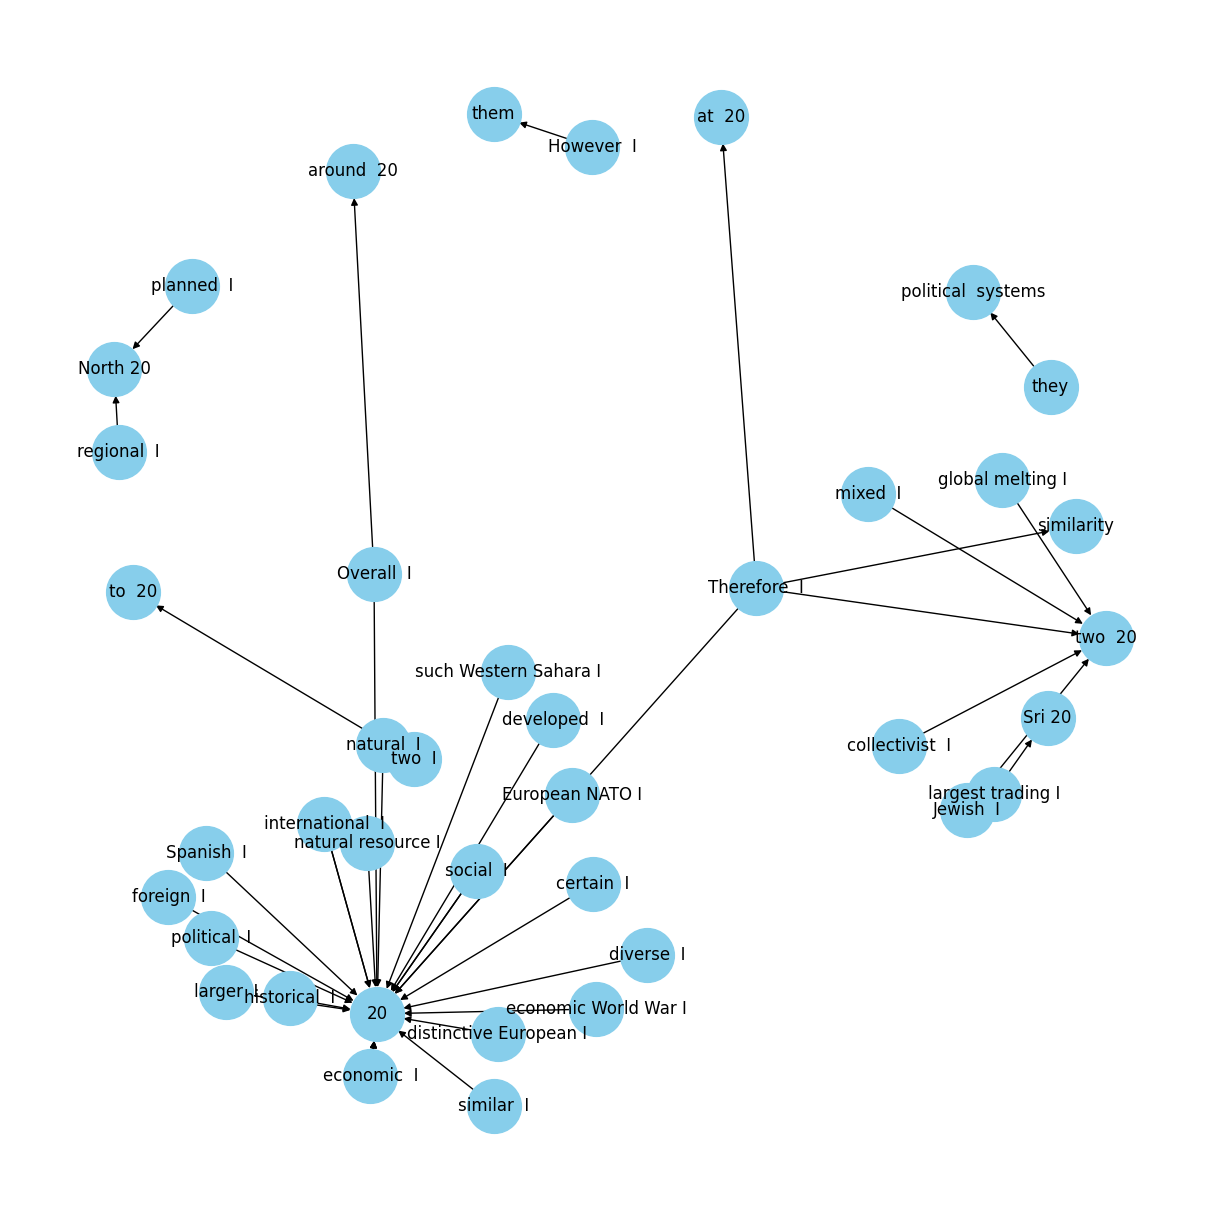

In [63]:
import networkx as nx

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="score"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

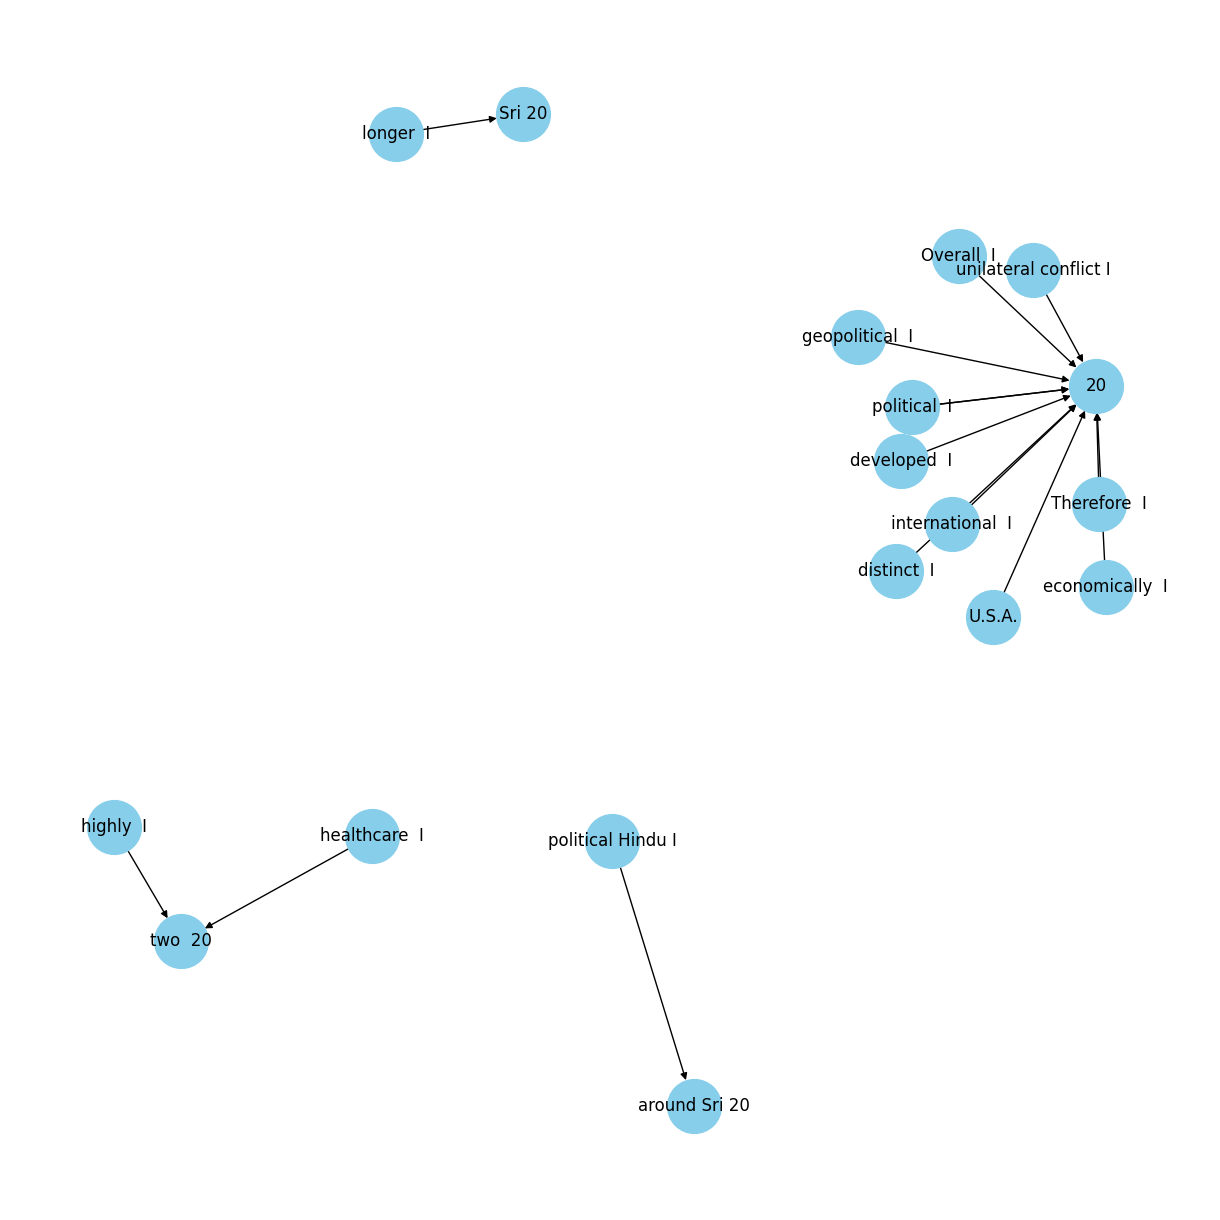

In [64]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="assess"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

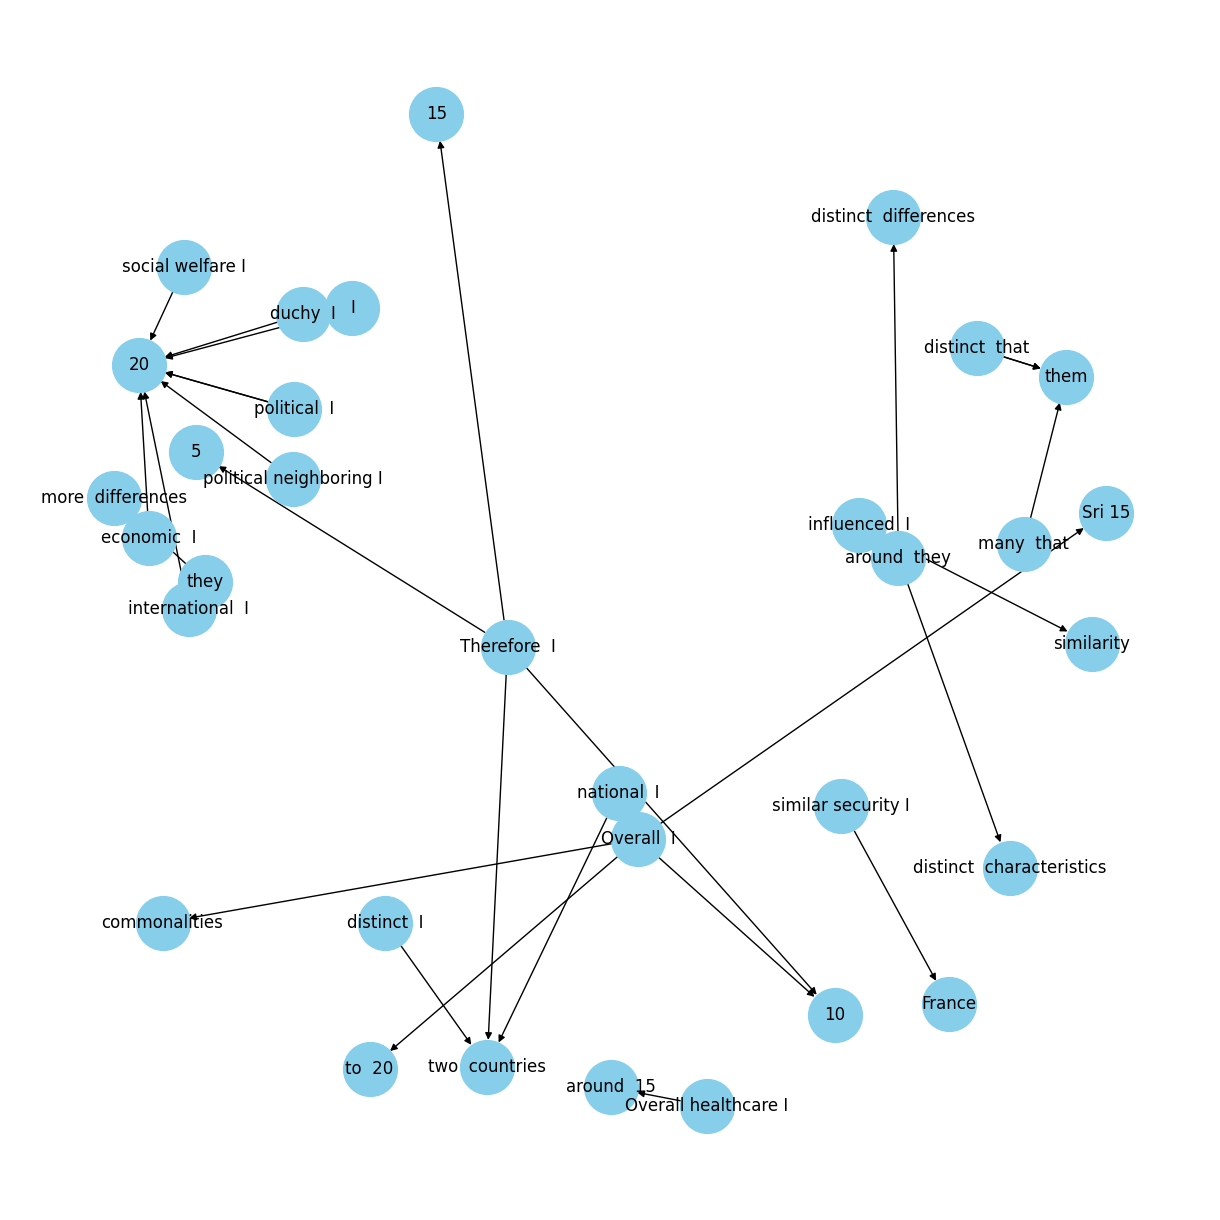

In [65]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="rate"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()